In [103]:
#libraries that you may use
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
'''Pokemon Go is an augmented reality game developed by Nantic, Inc for Android and iOS. In this game, there are beings called Pokemons that can be captured by players. 
These beings can still be used to play with others in gyms. 
The 'pokemon.csv' file displays data about Pokemons.
Each line represents a pokemon, including the following data:
MAX_HP -Max of life 
MAX_ATT- Max damage 
MAX_DEF -Max defense 
MAX_CP - Max power of combat 
CATCH_RATE - Probability of catching 
ESCAPE_RATE - probability of escaping 
Type 1 
Type 2'''

In [3]:
df=pd.read_csv("pokemon.csv", encoding="ANSI")

In [4]:
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [8]:
df.dtypes

#                  object
NAME_ENGLISH       object
NAME_GERMAN        object
NAME_FRENCH        object
NAME_JAPAN         object
NAME_KOREAN        object
TYP1               object
TYP2               object
GENERATION        float64
CANDY             float64
BUDDY_DISTANCE    float64
MAX_HP            float64
MAX_ATT           float64
MAX_DEF           float64
MAX_CP            float64
CATCH_RATE         object
ESCAPE_RATE        object
SHINY              object
ICON_PATH          object
SPRITE_PATH        object
dtype: object

In [19]:
'''
Identify how many types 1 types 2 are there?
'''

lenoftyp1=df["TYP1"].unique()
lenoftyp1


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Fighting', 'Psychic',
       'Rock', 'Ghost', 'Dragon', 'Steel', 'Flying'], dtype=object)

In [20]:
lenoftyp2=df["TYP2"].unique()
lenoftyp2


array(['Poison', nan, 'Flying', 'Normal', 'Psychic', 'Steel', 'Ground',
       'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark', 'Dragon',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [21]:
len(lenoftyp1)

18

In [22]:
len(lenoftyp2)

19

In [24]:
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [27]:
'''
Create an explanatory model that the "target" is the "Max Power of Combat". Choose the features. 
It is suggested: Maximo of life, maximum damage and maximum defense. Use multiple models, including regressions.
'''

df1=df[['MAX_HP', 'MAX_DEF', 'MAX_CP', 'MAX_ATT', 'NAME_ENGLISH']]
df1.head()
df1.dropna()

,MAX_HP,MAX_DEF,MAX_CP,MAX_ATT,NAME_ENGLISH
0,128.0,111.0,1115.0,118.0,Bulbasaur
1,155.0,143.0,1699.0,151.0,Ivysaur
2,190.0,189.0,2720.0,198.0,Venusaur
3,118.0,93.0,980.0,116.0,Charmander
4,151.0,126.0,1653.0,158.0,Charmeleon
5,186.0,173.0,2889.0,223.0,Charizard
6,127.0,121.0,946.0,94.0,Squirtle
7,153.0,155.0,1488.0,126.0,Wartortle
8,188.0,207.0,2466.0,171.0,Blastoise
9,128.0,55.0,437.0,55.0,Caterpie


In [35]:
Y=df1[['MAX_CP']]
X=df1[['MAX_HP','MAX_DEF', 'MAX_ATT']]

X

,MAX_HP,MAX_DEF,MAX_ATT
0,128.0,111.0,118.0
1,155.0,143.0,151.0
2,190.0,189.0,198.0
3,118.0,93.0,116.0
4,151.0,126.0,158.0
5,186.0,173.0,223.0
6,127.0,121.0,94.0
7,153.0,155.0,126.0
8,188.0,207.0,171.0
9,128.0,55.0,55.0


In [36]:
Y

,MAX_CP
0,1115.0
1,1699.0
2,2720.0
3,980.0
4,1653.0
5,2889.0
6,946.0
7,1488.0
8,2466.0
9,437.0


In [41]:
X1=X.dropna()
X1

,MAX_HP,MAX_DEF,MAX_ATT
0,128.0,111.0,118.0
1,155.0,143.0,151.0
2,190.0,189.0,198.0
3,118.0,93.0,116.0
4,151.0,126.0,158.0
5,186.0,173.0,223.0
6,127.0,121.0,94.0
7,153.0,155.0,126.0
8,188.0,207.0,171.0
9,128.0,55.0,55.0


In [42]:
Y1=Y.dropna()
Y1

,MAX_CP
0,1115.0
1,1699.0
2,2720.0
3,980.0
4,1653.0
5,2889.0
6,946.0
7,1488.0
8,2466.0
9,437.0


In [93]:
from sklearn.linear_model import LinearRegression

Regression=LinearRegression()
model=Regression.fit(X1,Y1)

In [94]:
model.intercept_

array([-1297.60800949])

In [95]:
model.coef_

array([[ 4.64031022,  5.26935569, 10.43250854]])

In [96]:
model.score(X1,Y1)

0.9649749015950121

In [97]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [98]:
X=sm.add_constant(X1)
model=sm.OLS(Y1,X).fit()

model.summary()

C:\Users\Ifeanyi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MAX_CP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4812.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:37:36   Log-Likelihood:                -3457.5
No. Observations:                 528   AIC:                             6923.
Df Residuals:                     524   BIC:                             6940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1297.6080     28.883    -44.927      0.000   -1354.348   -1240.868
MAX_HP         4.6403      0.155     29.990      0.000       4.336       4.944
MAX_DEF        5.2694      0.155     34.033      0.000       4.965       5.574
MAX_ATT       10.4325      0.151     69.319      0.000      10.137      10.728
==============================================================================
Omnibus:                      258.997   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5459.330
Skew:                          -1.642   Prob(JB):                         0.00
Kurtosis:                      18.407   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

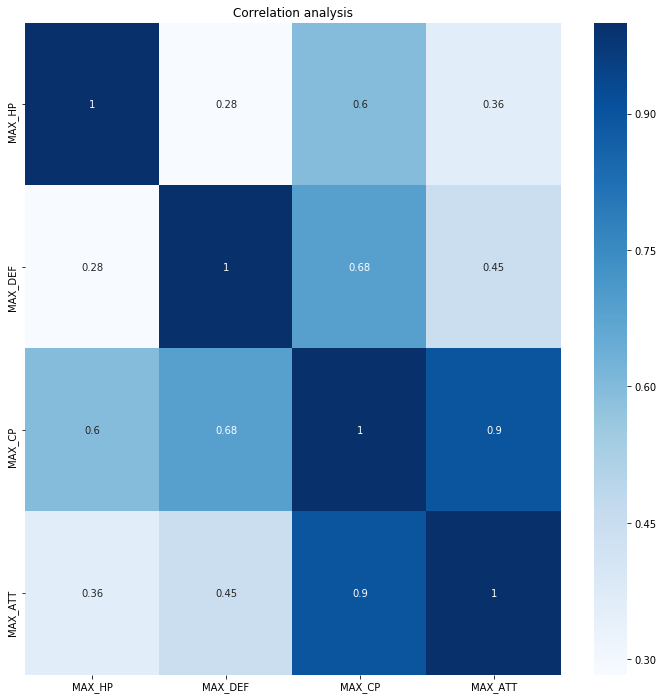

In [110]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = df1.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

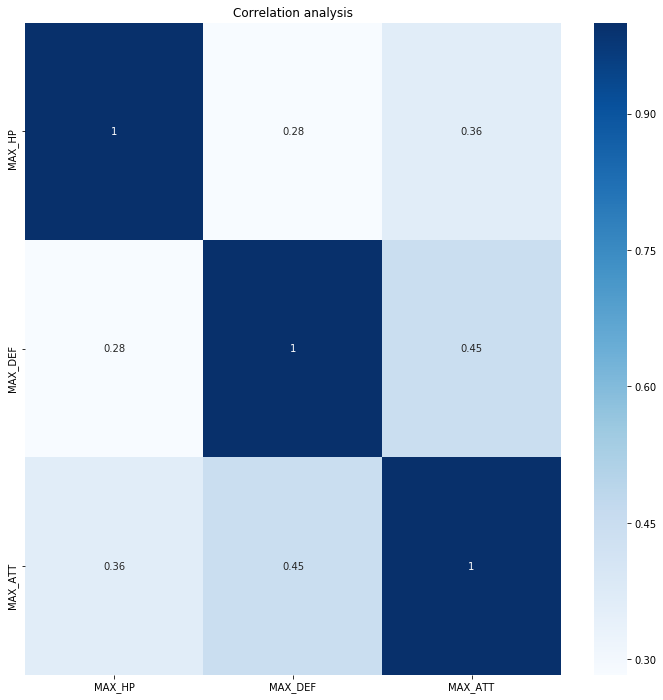

In [111]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = X1.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [112]:
'''
Analyze whether intendant variables should be eliminated. For example, 
if they have reduced variability or if they are too correlated with each other.
'''

df1.head()

,MAX_HP,MAX_DEF,MAX_CP,MAX_ATT,NAME_ENGLISH
0,128.0,111.0,1115.0,118.0,Bulbasaur
1,155.0,143.0,1699.0,151.0,Ivysaur
2,190.0,189.0,2720.0,198.0,Venusaur
3,118.0,93.0,980.0,116.0,Charmander
4,151.0,126.0,1653.0,158.0,Charmeleon


In [113]:
df2=df1[['MAX_DEF', 'MAX_CP', 'MAX_ATT']]
df2.head()

,MAX_DEF,MAX_CP,MAX_ATT
0,111.0,1115.0,118.0
1,143.0,1699.0,151.0
2,189.0,2720.0,198.0
3,93.0,980.0,116.0
4,126.0,1653.0,158.0


In [114]:
df2.dropna()

,MAX_DEF,MAX_CP,MAX_ATT
0,111.0,1115.0,118.0
1,143.0,1699.0,151.0
2,189.0,2720.0,198.0
3,93.0,980.0,116.0
4,126.0,1653.0,158.0
5,173.0,2889.0,223.0
6,121.0,946.0,94.0
7,155.0,1488.0,126.0
8,207.0,2466.0,171.0
9,55.0,437.0,55.0


In [116]:
Y2=df2[['MAX_CP']]
X2=df2[['MAX_DEF', 'MAX_ATT']]


In [126]:
U=Y2.dropna()
U

,MAX_CP
0,1115.0
1,1699.0
2,2720.0
3,980.0
4,1653.0
5,2889.0
6,946.0
7,1488.0
8,2466.0
9,437.0


In [125]:
P=X2.dropna()
P

,MAX_DEF,MAX_ATT
0,111.0,118.0
1,143.0,151.0
2,189.0,198.0
3,93.0,116.0
4,126.0,158.0
5,173.0,223.0
6,121.0,94.0
7,155.0,126.0
8,207.0,171.0
9,55.0,55.0


In [128]:
from sklearn.linear_model import LinearRegression

Regression=LinearRegression()
model2=Regression.fit(U,P)

In [129]:
model2.intercept_

array([68.85608476, 53.60345634])

In [130]:
model2.coef_

array([[0.04084941],
       [0.05669095]])

In [131]:
model2.score(U,P)

C:\Users\Ifeanyi\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6462579452860036

In [137]:
import statsmodels.api as sm

In [138]:
X3=sm.add_constant(P)
mode2=sm.OLS(U,X3).fit()

mode2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MAX_CP   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2497.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          6.67e-269
Time:                        12:10:06   Log-Likelihood:                -3721.3
No. Observations:                 528   AIC:                             7449.
Df Residuals:                     525   BIC:                             7461.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -858.1175     40.982    -20.939      0.000    -938.626    -777.609
MAX_DEF        5.9392      0.252     23.542      0.000       5.444       6.435
MAX_ATT       11.6817      0.238     49.055      0.000      11.214      12.149
==============================================================================
Omnibus:                      113.229   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.597
Skew:                          -0.663   Prob(JB):                    6.36e-212
Kurtosis:                       9.515   Cond. No.                         760.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

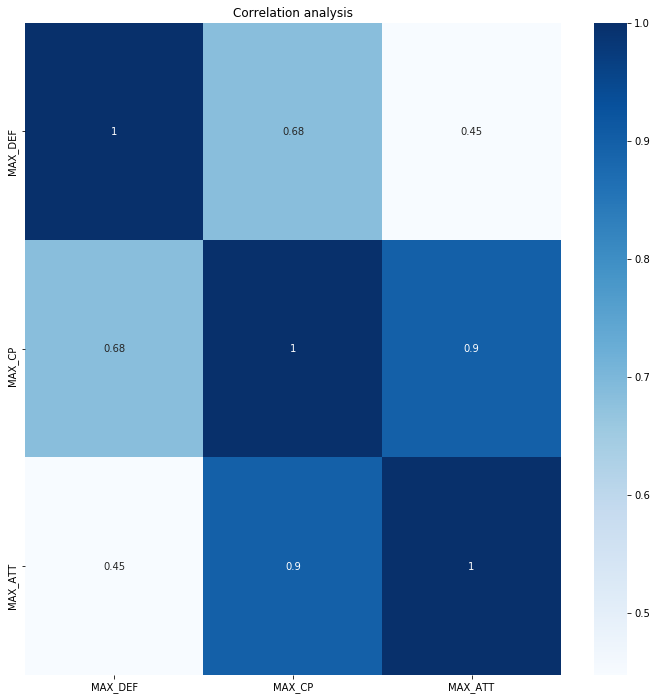

In [139]:
import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12, 12])
corr_mtx = df2.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

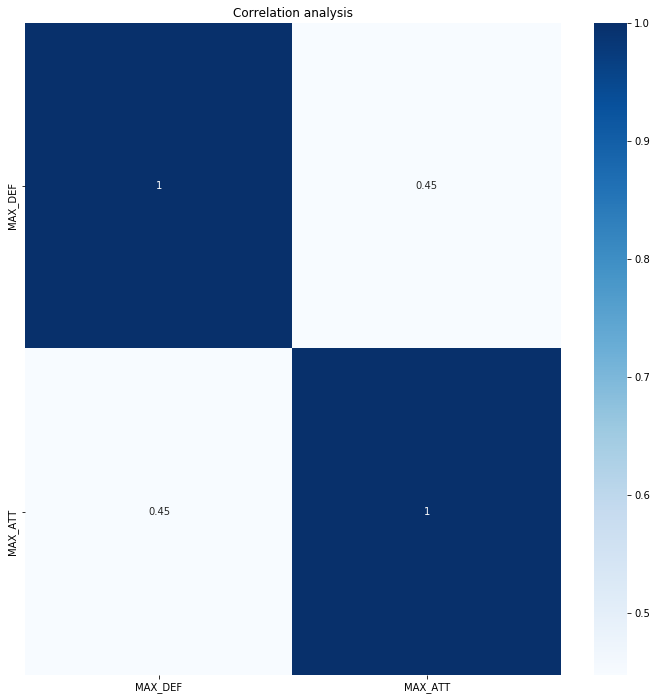

In [140]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = P.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [ ]:
#Model 1 is a better fit as it explains the independent variable better than the model 2, basically because it has more explainatory variables, but we should also watch out for multicollinearity problems, but checking the correlation with the independent variables proved that the model 1n was preferred. 
#Therefore dropping the variable was not really necessary in the first place.